## 1. 군집 모델

## 2. K-Means 클러스터링

### 2.1 sklearn.cluster.KMeans

### 2.2 K-Means 클러스터링

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, n_classes=2, random_state=123)

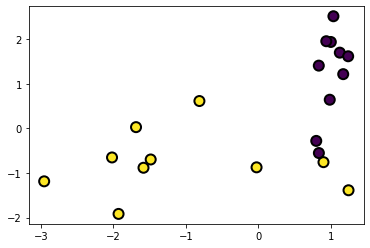

In [2]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.show()

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', random_state=1)
model.fit(X)

KMeans(init='random', n_clusters=2, random_state=1)

In [4]:
# 두 클러스터의 중심점
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [5]:
# 클러스터링을 통해 예측한 레이블
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

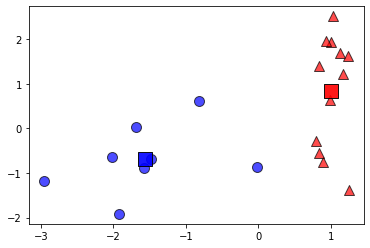

In [8]:
# 클러스터링 결과 시각화
c0, c1 = model.cluster_centers_

plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0, 1], s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1, 1], s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, marker='s', c='r', edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1], s=200, marker='s', c='b', edgecolor='k', alpha=0.9)

plt.show()

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=np.c_[X, 
                             np.linalg.norm(X-c0, axis=1),
                             np.linalg.norm(X-c1, axis=1),
                             model.labels_],
                             columns=['X0', 'X1', 'd0', 'd1', 'class'])

df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


### 2.3 회차별 군집 확인하기

In [10]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_

    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200,
                c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1],
                s=200, c='b', marker='o', edgecolor='k', alpha=0.9)

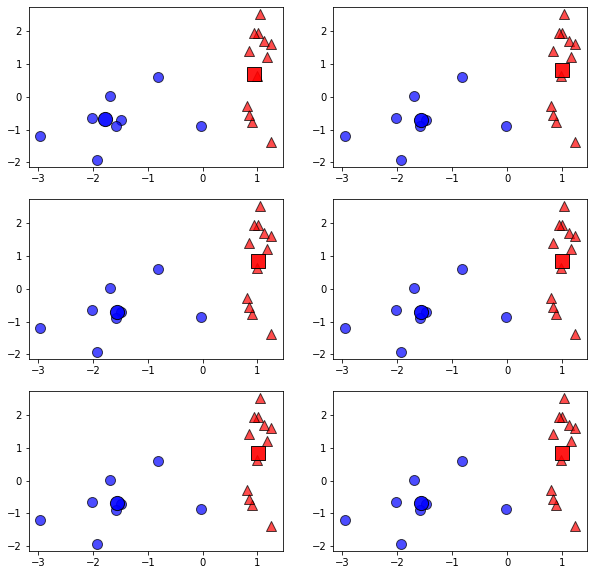

In [11]:
plt.figure(figsize=(10,10))

for i in range(6):
    model = KMeans(n_clusters=2, init="random", n_init=3,
                   max_iter=(i+1), random_state=1)
    model.fit(X)
    plt.subplot(3,2,(i+1))
    plot_cluster(model, X)

### 2.4 iris 데이터 군집분석

In [12]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=3, random_state=1)

In [14]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
# 원본 데이터 레이블과 같도록 레이블 재조정
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

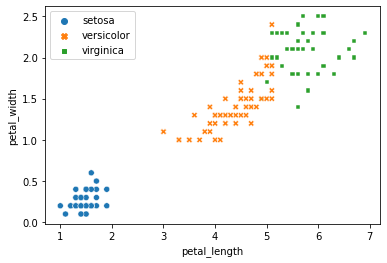

In [16]:
# 군집분석 결과 시각화
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 레이블 인코딩 inverse를 이용하여 예측값들을 텍스트 레이블로 변환
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

ax = sns.scatterplot(x='petal_length', y='petal_width', hue=pred_str, style=pred_str, data=iris)

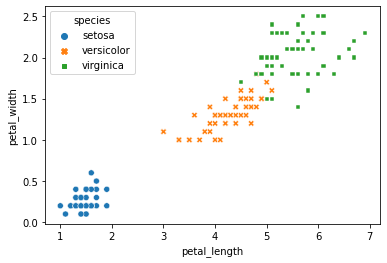

In [17]:
# 원본 데이터 시각화
ax = sns.scatterplot(x='petal_length', y='petal_width', hue='species', style='species', data=iris)

### 2.5 K-Means 클러스터링의 한계와 극복

In [18]:
# 1. 크기가 다를 경우
np.random.seed(0)

# 첫 번째 군은 평균 -10, 표준편차 2인 임의 데이터 10개 생성
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [19]:
# 두 번째 군
group1 = np.random.normal(10, 2, (10,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

# 세 번째 군
group2 = np.random.normal(0, 5, (100,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

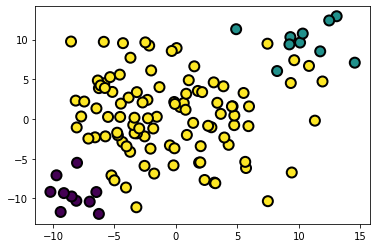

In [22]:
import warnings
warnings.filterwarnings('ignore')

data = np.r_[group0, group1, group2]
plt.scatter(x=data[:, 0], y=data[:, 1], marker='o', c=data[:, 2].astype(np.int), s=100, edgecolor='k', linewidth=2)
plt.show()

In [23]:
# 3개의 군으로 나눔
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=3)

In [29]:
model.cluster_centers_

array([[ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046],
       [-3.23795138,  3.79797742]])

In [25]:
pred = model.predict(data[:, 0:2])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2])

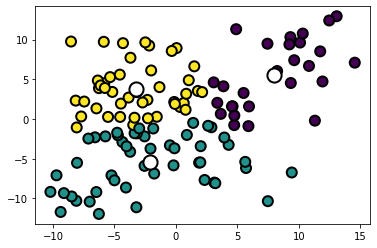

In [26]:
c = model.cluster_centers_
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100, edgecolor='k', linewidth=2)
plt.scatter(x=c[:, 0], y=c[:, 1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

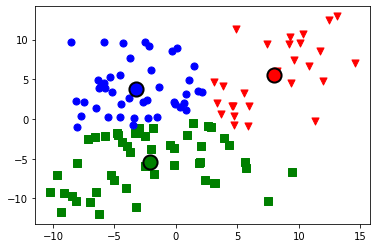

In [30]:
# 각 군집별 다른 점 스타일로 시각화
c0, c1, c2 = model.cluster_centers_

plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')

plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)

plt.show()

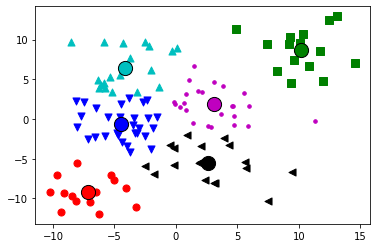

In [32]:
# cluster 수 6개
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init="random")
model.fit(data[:, 0:2])

centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'k']
markers = ['o', 's', 'v', '^', '.', '<']

for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k')

plt.show()

In [33]:
# 2. 밀도가 다를 경우
import numpy as np
np.random.seed(0)

group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

data = np.r_[group0, group1, group2]

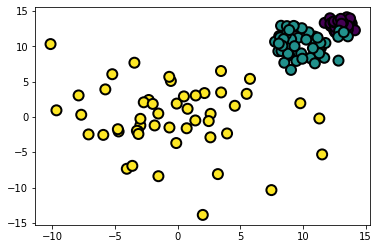

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=data[:, 0], y=data[:, 1], marker='o', c=data[:, 2].astype(np.int), s=100,
            edgecolor="k", linewidth=2)

plt.show()

In [35]:
# cluster 3개인 군집모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])
pred = model.predict(data[:, 0:2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2])

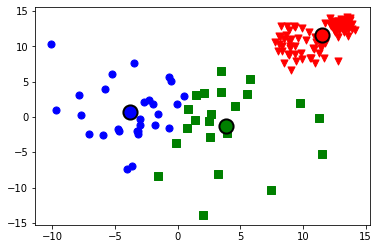

In [36]:
# 군집분석 시각화
c0, c1, c2 = model.cluster_centers_

plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')

plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)

plt.show()

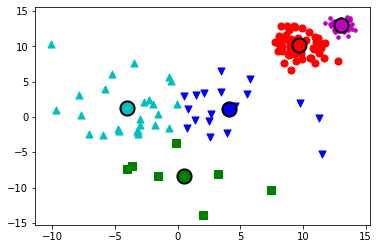

In [37]:
# 군집 수 5개 모델 결과 시각화
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init="random")
model.fit(data[:, 0:2])
centers = model.cluster_centers_

colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'v', '^', '.']

for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200,
                c=colors[i], edgecolor='k', linewidth=2)

plt.show()

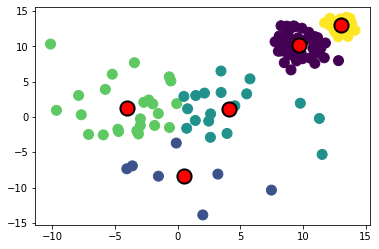

In [38]:
pred = model.predict(data[:,0:2])
c = model.cluster_centers_

plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

In [39]:
# 3. 비 구형인 경우
import numpy as np
np.random.seed(0)

X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise
X2 = X1 + 1.5
Y2 = np.cos(X2) + noise

group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

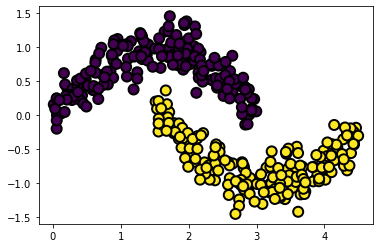

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=data[:, 0], y=data[:, 1], marker='o', c=data[:, 2].astype(np.int),
            s=100, edgecolor="k", linewidth=2)
plt.show()

In [41]:
# 군 개수 2개 모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=2)

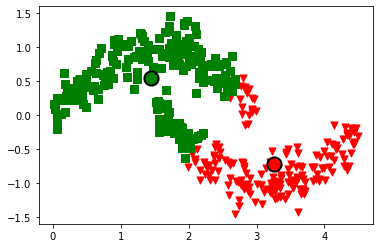

In [42]:
# 군집모델 결과 시각화
c0, c1 = model.cluster_centers_

plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')

plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)

plt.show()

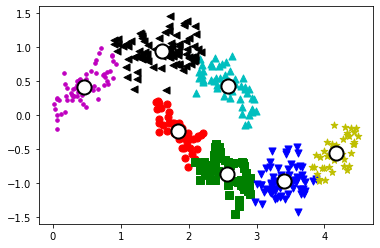

In [43]:
# 군집 수 7개 모델 생성 및 시각화
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:, 0:2])

center = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'v', '^', '.', '*', '<']

for i, c in enumerate(center):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w', edgecolor='k', linewidth=2)

plt.show()

In [44]:
# 실루엣 계수 출력
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=2)
    
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:, :-1], cluster_labels)

    print("클러스터 수: {}, 실루엣 계수: {}".format(n_clusters, score))

클러스터 수: 2, 실루엣 계수: 0.533235774308134
클러스터 수: 3, 실루엣 계수: 0.4701230677079941
클러스터 수: 4, 실루엣 계수: 0.4732502498237369
클러스터 수: 5, 실루엣 계수: 0.45962085906799105
클러스터 수: 6, 실루엣 계수: 0.49827095148830175
클러스터 수: 7, 실루엣 계수: 0.5027363876263838
클러스터 수: 8, 실루엣 계수: 0.4918697936848558
클러스터 수: 9, 실루엣 계수: 0.47303667875323785
클러스터 수: 10, 실루엣 계수: 0.4504109748038108


## 3. Hierarchical 클러스터링

In [62]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [64]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method='complete')

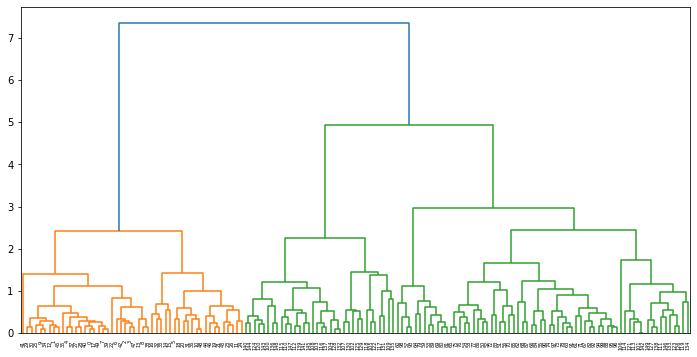

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

### 3.1 계층적 분석 방법

In [66]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method="complete")

### 3.2 계층 분석을 통한 군집의 수 결정

In [67]:
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, 4, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [68]:
fcluster(cluster_model, 2, criterion="distance")

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

In [69]:
predict = fcluster(cluster_model, 4, criterion='distance')
adjusted_pred = np.choose((predict-1), [0, 2, 1])
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [70]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)
pd.crosstab(origin_name, pred_name, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

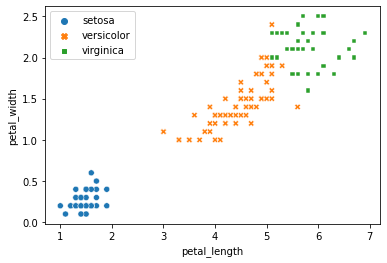

In [71]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue=pred_name, style=pred_name)

## 4. DBSCAN 클러스터링

In [84]:
import numpy as np

X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise

X2 = X1 +1.5
Y2 = np.cos(X2) + noise

group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]

data = np.r_[group1, group2]

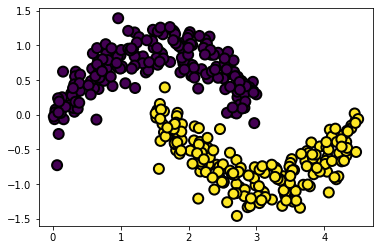

In [85]:
import matplotlib.pyplot as plt

plt.scatter(x=data[:,0], y=data[:,1], marker='o', c=data[:,2].astype(np.int), s=100, edgecolor='k', linewidth=2)
plt.show()

In [86]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:, 0:2])

DBSCAN(eps=0.3, min_samples=10)

In [87]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_noise_

3

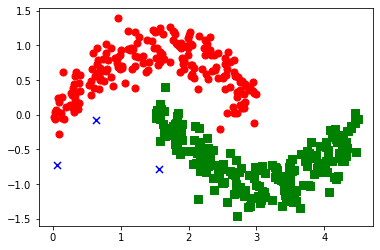

In [88]:
colors = ['r', 'g']
markers = ['o', 's']

for i in range(n_clusters_):
    plt.scatter(x=data[db.labels_==i, 0], y=data[db.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])

plt.scatter(x=data[db.labels_==-1, 0], y=data[db.labels_==-1, 1],
            s=50, marker='x', c='b')

plt.show()

## 5. 군집모형 성능평가

### 5.1 클러스터의 개수 및 소속을 알고 있는 경우

In [1]:
# 1. Adjusted Rand index
def rand_index(y_true, y_pred):
    n = len(y_true)
    a, b = 0, 0

    for i in range(n):
        for j in range(i+1, n):
            if (y_true[i] == y_true[j]) & (y_pred[i] == y_pred[j]):
                a += 1
            elif (y_true[i] != y_true[j]) & (y_pred[i] != y_pred[j]):
                b += 1
            else:
                pass

    RI = (a + b) / (n*(n-1) / 2)
    return RI

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species

In [3]:
from sklearn.cluster import KMeans

iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=3, random_state=1)

In [4]:
import numpy as np

pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
predict = le.inverse_transform(pred)

In [7]:
rand_index(y_true=iris.species, y_pred=predict)

0.8797315436241611

In [8]:
# iris data 2개 군으로 설정 후 군집분석 및 랜드지수 확인 시행
iris_cluster_model = KMeans(n_clusters=2, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=2, random_state=1)

In [9]:
iris_cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_true = [1]*50 + [0]*100 # setosa는 1, versicolor와 virginica는 0
rand_index(y_true, iris_cluster_model.labels_)

0.9605369127516779

In [12]:
# 수정된 랜드지수 (ARI)
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris.species, labels_pred=predict)

0.7302382722834697

In [13]:
# 2. Adjusted Mutual Information
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(labels_true=iris.species, labels_pred=predict)

0.7551191675800483

In [14]:
# 3. Fowlkes-Mallows index
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(labels_true=iris.species, labels_pred=predict)

0.8208080729114153

In [15]:
# 4. homogeneity, completeness, v-measure
from sklearn.metrics import homogeneity_score
homogeneity_score(labels_true=iris.species, labels_pred=predict)

0.7514854021988338

In [16]:
from sklearn.metrics import completeness_score
completeness_score(labels_true=iris.species, labels_pred=predict)

0.7649861514489815

In [17]:
from sklearn.metrics import v_measure_score
v_measure_score(labels_true=iris.species, labels_pred=predict)

0.7581756800057784

### 5.2 클러스터의 개수 및 소속을 모르고 있는 경우

In [18]:
# 1. 응집도, 분리도
# 2. 실루엣 계수
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [19]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.7653904101258123


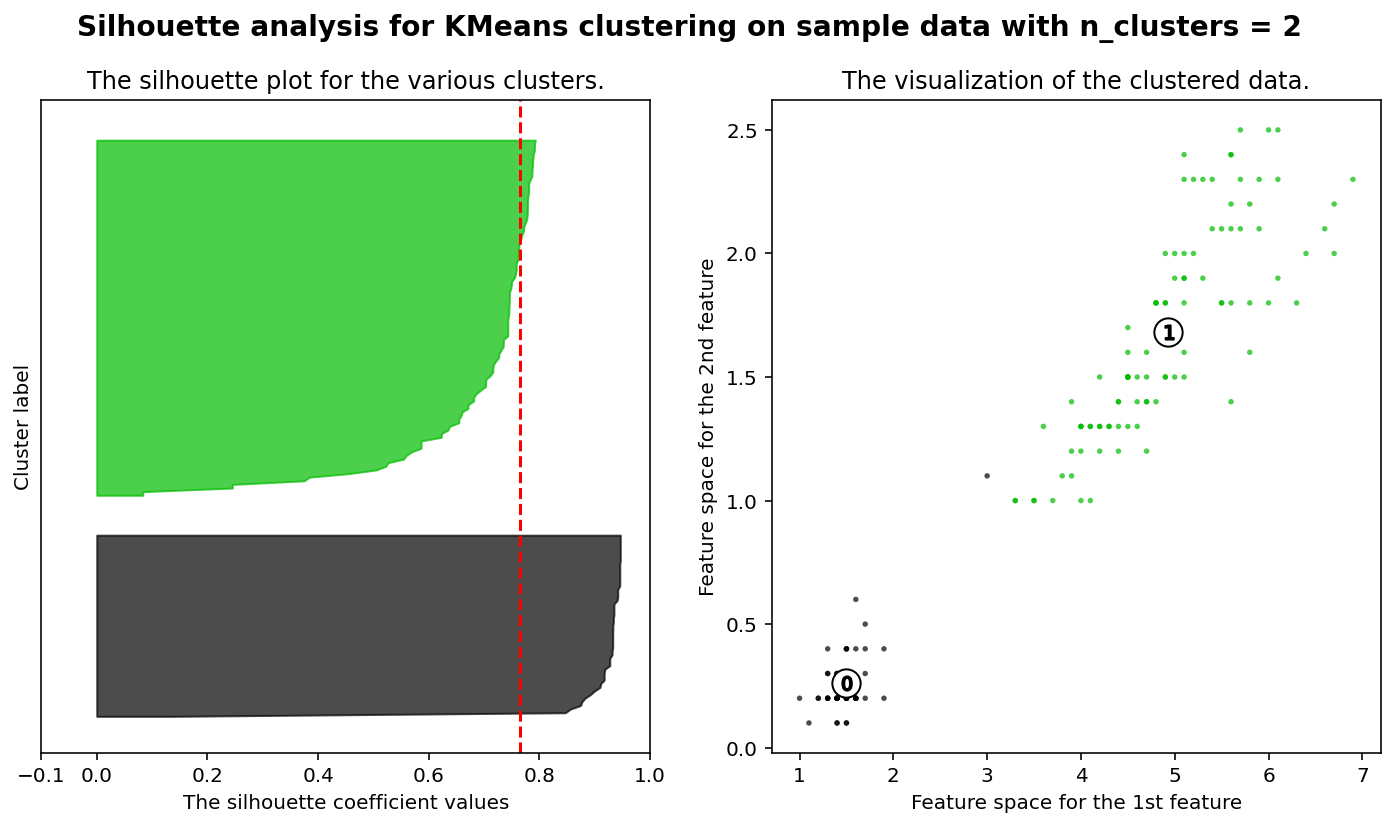

For n_clusters = 3 The average silhouette_score is : 0.6604800083974887


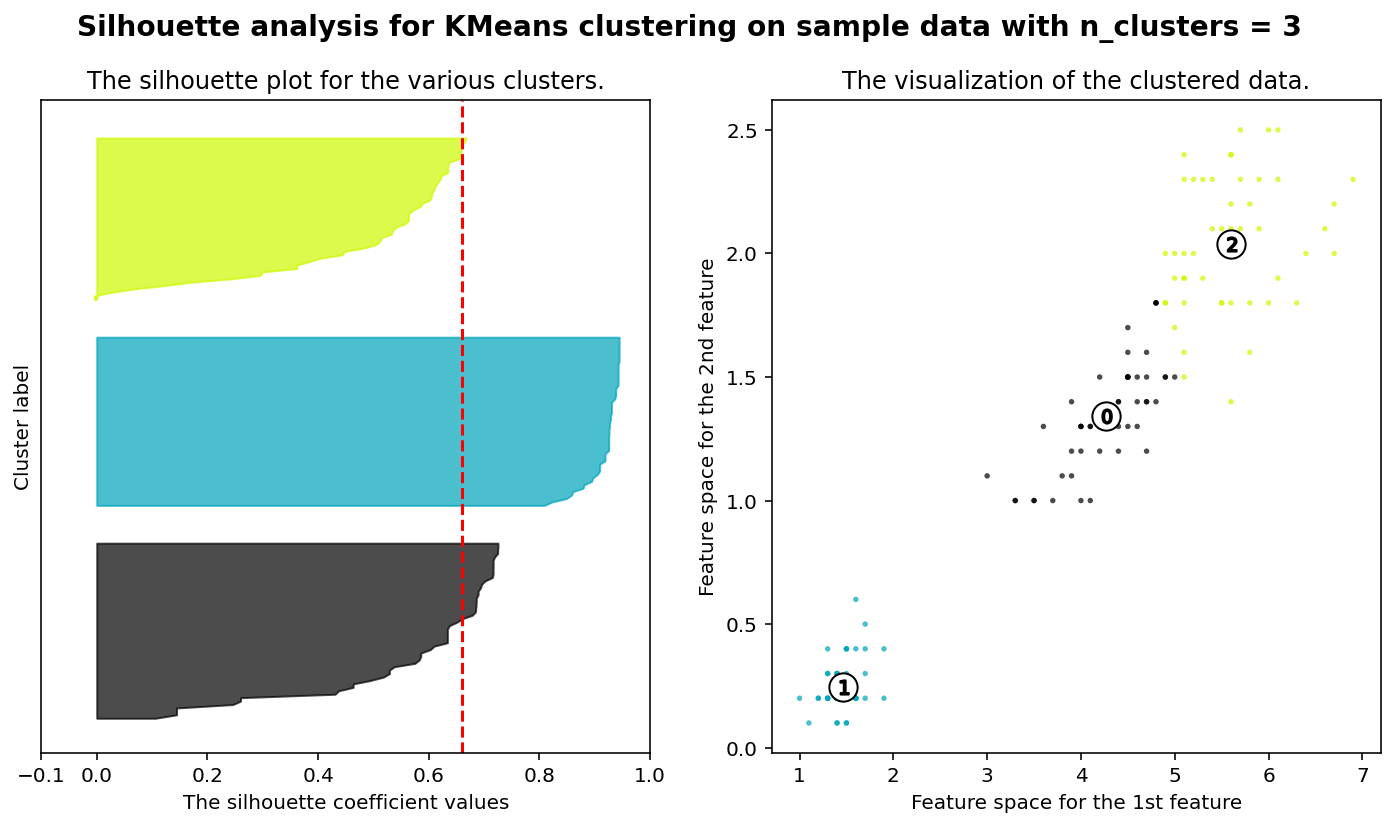

For n_clusters = 4 The average silhouette_score is : 0.6127580794464402


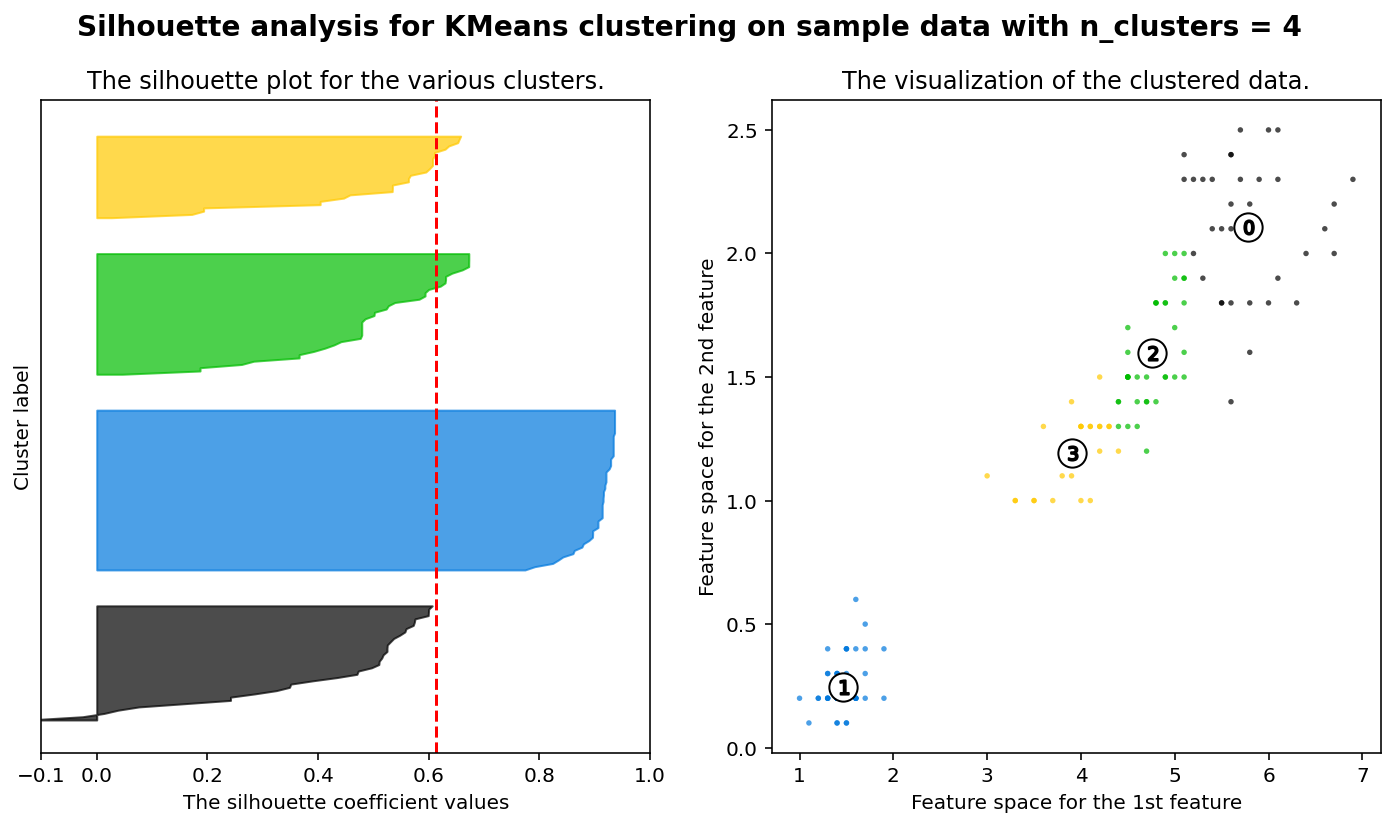

For n_clusters = 5 The average silhouette_score is : 0.5883732712110276


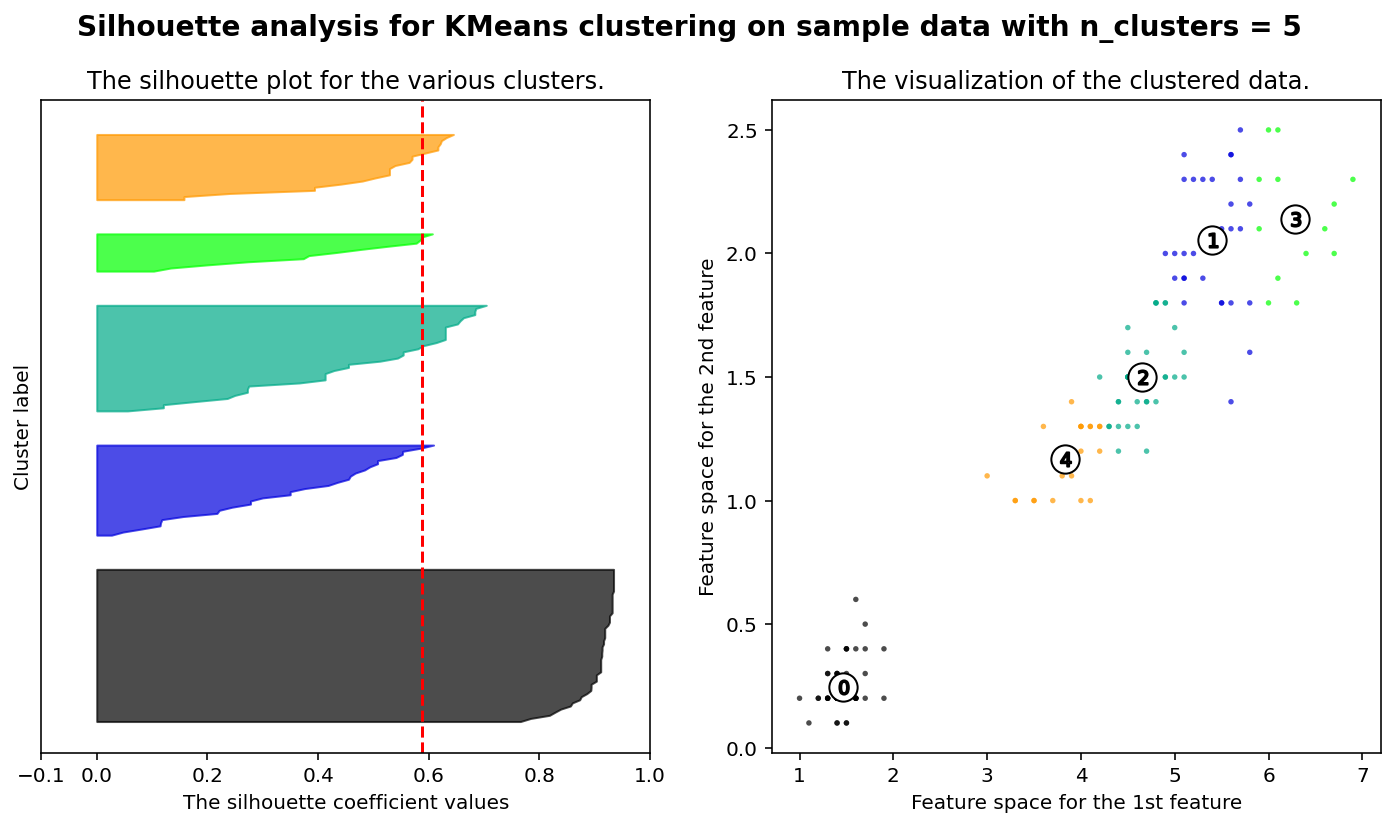

For n_clusters = 6 The average silhouette_score is : 0.5769601940397073


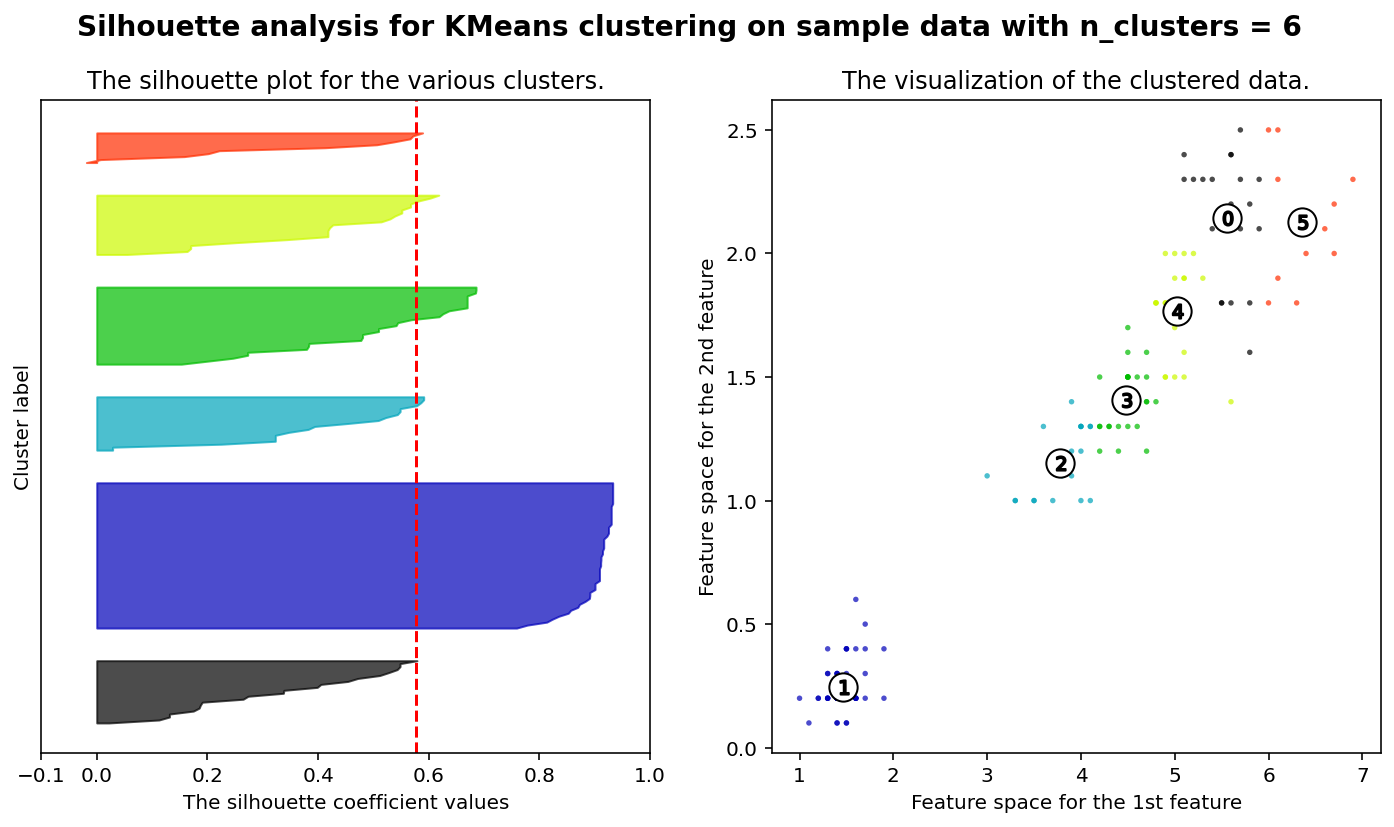

In [21]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])

    # 클러스터의 수만큼 KMeans 모형을 만들고 클러스터를 예측함
    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(iris_X)

    # 모든 샘플에 대한 실루엣 스코어 평균값을 계산함
    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대해서 실루엣 스코어를 계산함
    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 변수의 평균 실루엣 점수를 이용해 수직선을 추가함
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터 된 산점도 그래프를 그려줌
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터 라벨링
    centers = model.cluster_centers_

    # 클러스터 중앙에 태두리가 검정색인 하얀 원을 그림
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    plt.show()

In [22]:
# 3. WSS와 엘보우
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")
X = iris.loc[:, ["petal_length", "petal_width"]]
x1 = iris.petal_length
x2 = iris.petal_width

In [23]:
# 군의 개수를 1개부터 9개까지 각 군의 유클리드 거리 계산하여 저장
distortions = []
K = range(1,10)

for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    kmeans_model.fit(X)
    euc_dist = cdist(X, kmeans_model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(euc_dist, axis=1)) / X.shape[0]
    distortions.append(distortion)

In [24]:
# 굴곡이 심한 지점 탐색
from kneed import KneeLocator # pip install kneed
kn = KneeLocator(list(K), distortions, curve='convex', direction='decreasing')

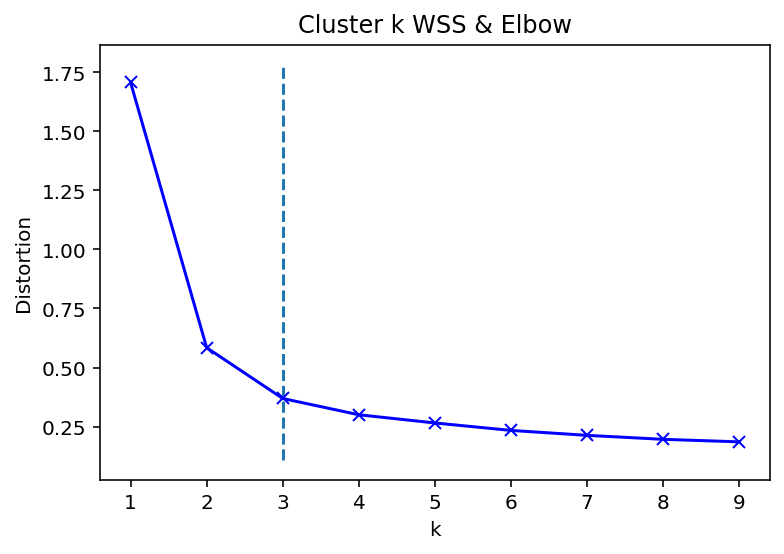

In [25]:
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster k WSS & Elbow')

plt.show()

In [26]:
# 4. Calinski Harabasz Score
import seaborn as sns
iris = sns.load_dataset("iris")

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

In [27]:
ch_score = []
data = iris.iloc[:, :-1]

for i in range(2,6):
    clustering = AgglomerativeClustering(n_clusters=i).fit(data)
    ch_score.append(calinski_harabasz_score(data, clustering.labels_))
    
ch_score # 군 2개부터 점수를 측정했으므로 두 번째, 즉 군 3개인 경우가 가장 좋은 군임

[502.82156350235897, 558.0580408128307, 515.0789062430442, 488.48490403651624]